In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv('UberDataset.csv')
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
uber=uber.dropna(subset=['START_DATE','END_DATE','CATEGORY','START','STOP'])

In [8]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [10]:
uber.value_counts('CATEGORY').head(4)

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

In [11]:
uber.value_counts('PURPOSE').head(4)

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Name: count, dtype: int64

In [12]:
uber.value_counts('START').head(4)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Name: count, dtype: int64

In [13]:
uber.value_counts('STOP').head(4)

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Name: count, dtype: int64

In [18]:
cat_purpose= pd.crosstab(uber['PURPOSE'],uber['CATEGORY'])
cat_purpose.idxmax()

CATEGORY
Business    Meeting
Personal     Moving
dtype: object

In [19]:
Business=uber.loc[uber['CATEGORY']=='Business'  ,'PURPOSE'].mode()[0]
Business

'Meeting'

In [20]:
uber.loc[(uber['CATEGORY'] == 'Business') & (uber['PURPOSE'].isna()), 'PURPOSE'] = Business

In [21]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1084 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [22]:
personal=uber.loc[uber["CATEGORY"]=='Personal' , 'PURPOSE'].mode([0])
personal

0    Moving
Name: PURPOSE, dtype: object

In [23]:
uber.loc[(uber['CATEGORY']=='Personal') & (uber['PURPOSE'].isna()) , 'PURPOSE' ]=personal

In [24]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1084 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [25]:
uber['PURPOSE']= uber['PURPOSE'].fillna ('Meeting')

Data Visualization

In [26]:
import matplotlib.pyplot as plt

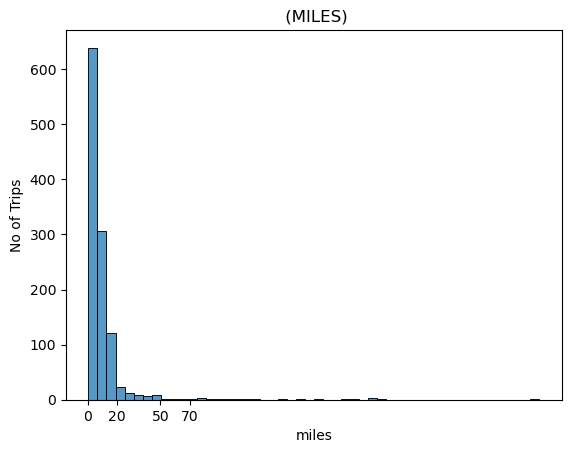

In [27]:
sns.histplot(uber['MILES'], bins=50)
plt.title(' (MILES)')
plt.xticks(ticks=[0,20,50,70])
plt.xlabel('miles')
plt.ylabel('No of Trips')
plt.show()

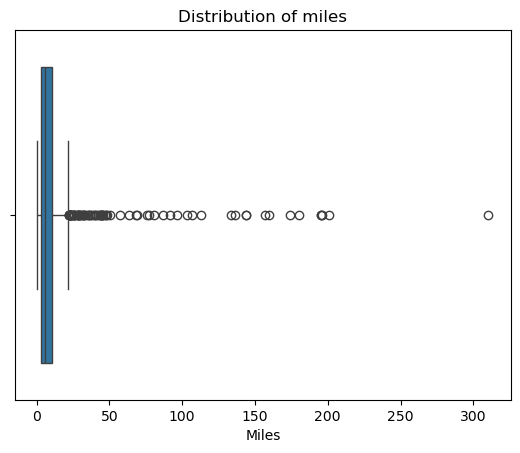

In [28]:
sns.boxplot(x=uber['MILES'])
plt.title('Distribution of miles')
plt.xlabel('Miles')
plt.show()

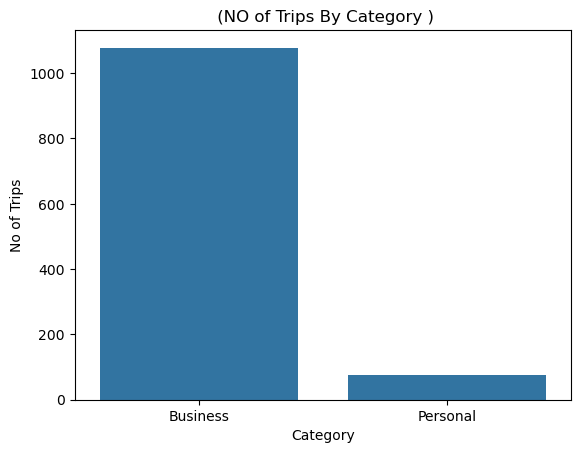

In [29]:
sns.countplot(x='CATEGORY',data=uber)

plt.title(' (NO of Trips By Category )')
plt.xlabel('Category')
plt.ylabel('No of Trips')
plt.show()

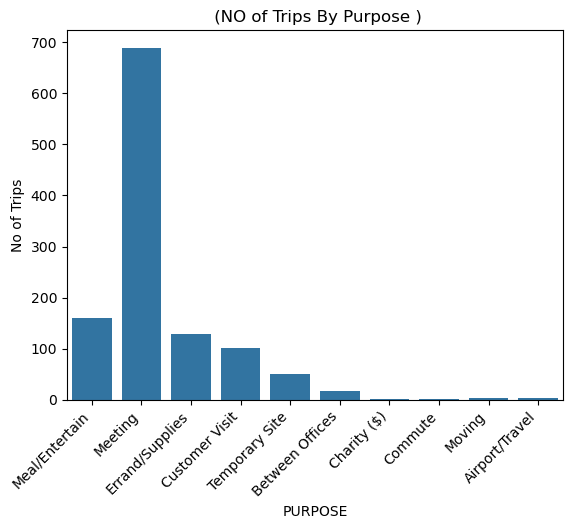

In [30]:
sns.countplot(x='PURPOSE',data=uber)
plt.title(' (NO of Trips By Purpose )')
plt.xticks(rotation=45, ha='right')
plt.xlabel('PURPOSE')
plt.ylabel('No of Trips')
plt.show()

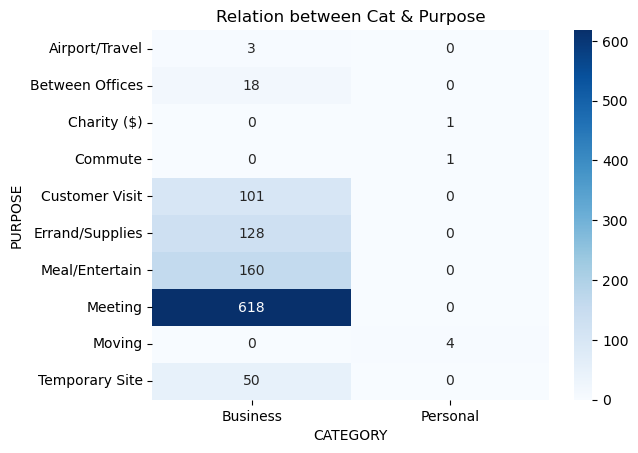

In [31]:
sns.heatmap(cat_purpose, annot=True, cmap='Blues', fmt='d')
plt.title('Relation between Cat & Purpose')
plt.show()

In [32]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [34]:
uber.to_csv('cleaned uber data.csv')